<a href="https://colab.research.google.com/github/Siddheshdumre/ML_LAB_Assignments/blob/main/DT_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = "./accident.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [3]:
# Check data info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [4]:
# Assuming the target column is 'Severity' (Change as needed)
target_column = 'Survived'  # Modify based on actual dataset
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target


In [7]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)


In [9]:
# Fill missing values with median (or mean/mode based on the dataset)
X.fillna(X.median(), inplace=True)
y.fillna(y.mode()[0], inplace=True)


,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Check Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.5500
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        22
           1       0.50      0.44      0.47        18

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.54        40
weighted avg       0.55      0.55      0.55        40



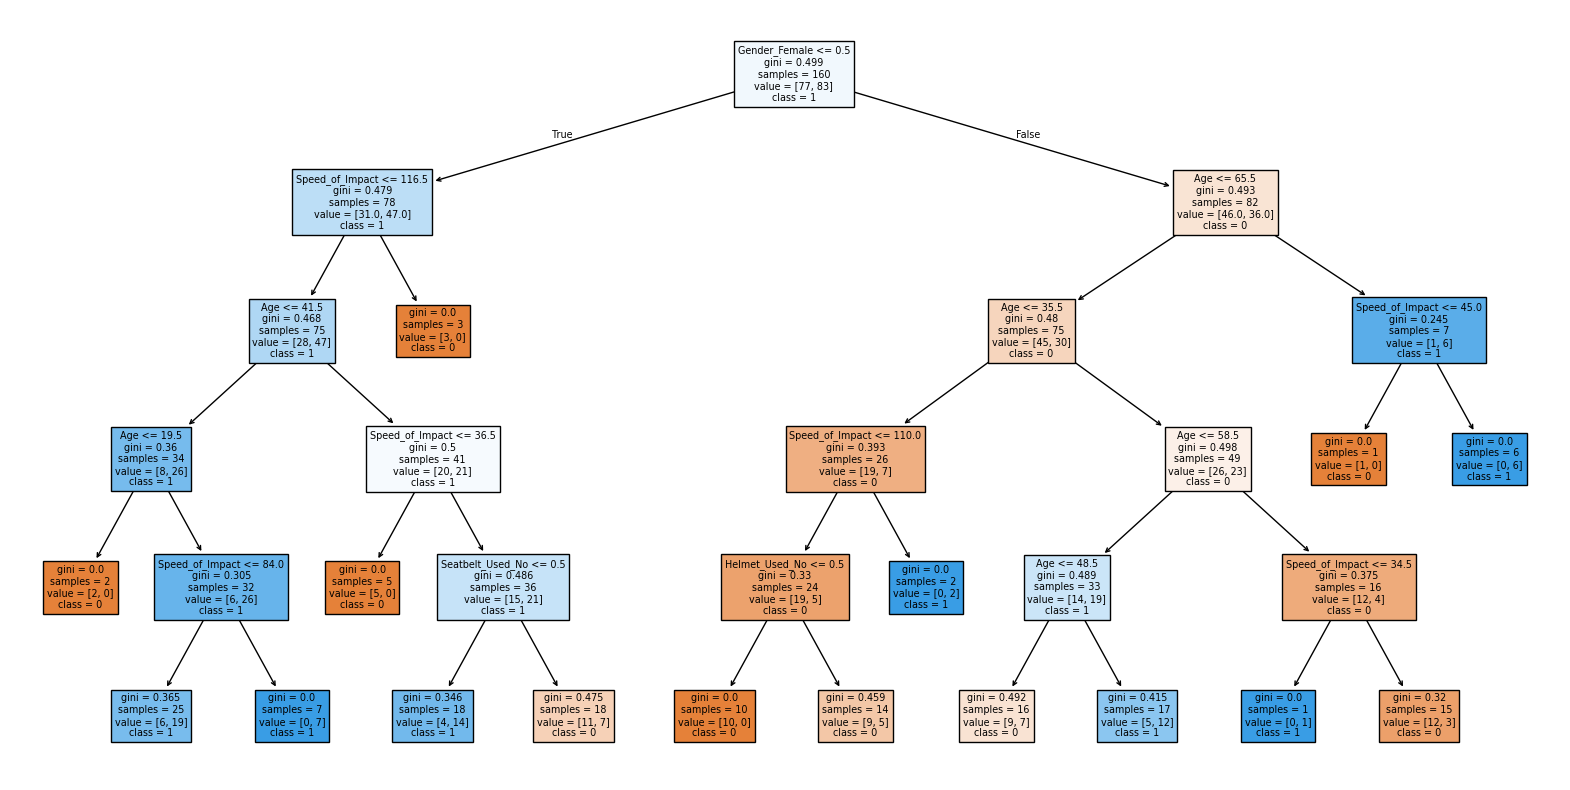

In [16]:
# Plot the decision tree
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.show()


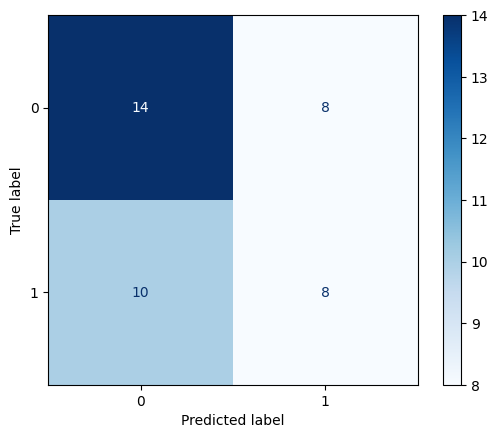

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")

plt.show()
